**Zulkifli Yasin Hidayatulloh**

Belajar Machine Learning untuk Pemula

**Persiapan Data**

In [1]:
# download data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2021-05-06 08:17:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  2.88MB/s    in 74s     

2021-05-06 08:18:34 (4.19 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# ekstrak data zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('file_data')
zip_ref.close()

In [3]:
!pip install split_folders

In [4]:
# mengcopy dan membagi data set menjadi train set (60%) dan validation set (40%)
import splitfolders

splitfolders.ratio('file_data/rockpaperscissors/rps-cv-images','file_data/rockpaperscissors/data_set', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3372.66 files/s]


In [5]:
# membuat direktori train dan validation
base_dir = 'file_data/rockpaperscissors/data_set'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('file_data/rockpaperscissors/data_set/train')

['rock', 'paper', 'scissors']

In [7]:
os.listdir('file_data/rockpaperscissors/data_set/val')

['rock', 'paper', 'scissors']

In [8]:
# membuat dir scissors, rock, paper pada dir data latih
train_sci_dir = os.path.join(train_dir, 'scissors')
train_roc_dir = os.path.join(train_dir, 'rock')
train_pap_dir = os.path.join(train_dir, 'paper')
# membuat dir scissors, rock, paper pada dir data validasi
validation_sci_dir = os.path.join(validation_dir, 'scissors')
validation_roc_dir = os.path.join(validation_dir, 'rock')
validation_pap_dir = os.path.join(validation_dir, 'paper')

In [25]:
# membuat objek image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [26]:
# membuat data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [27]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
# penggunaan callback untuk mencegah overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nakurasi lebih dari  98%, proses training selesai")
      self.model.stop_training = True

callback = myCallback()

In [31]:
mod = model.fit(
    train_generator,
    steps_per_epoch = 35,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 17,
    verbose =2,
      callbacks=[callback]
)

Epoch 1/25
35/35 - 63s - loss: 1.1182 - accuracy: 0.5241 - val_loss: 0.9172 - val_accuracy: 0.5827
Epoch 2/25
35/35 - 62s - loss: 0.5057 - accuracy: 0.7982 - val_loss: 0.4165 - val_accuracy: 0.8364
Epoch 3/25
35/35 - 62s - loss: 0.2860 - accuracy: 0.8973 - val_loss: 0.2701 - val_accuracy: 0.9007
Epoch 4/25
35/35 - 68s - loss: 0.1909 - accuracy: 0.9411 - val_loss: 0.3573 - val_accuracy: 0.8952
Epoch 5/25
35/35 - 63s - loss: 0.1271 - accuracy: 0.9607 - val_loss: 0.1761 - val_accuracy: 0.9375
Epoch 6/25
35/35 - 63s - loss: 0.1934 - accuracy: 0.9312 - val_loss: 0.1939 - val_accuracy: 0.9283
Epoch 7/25
35/35 - 63s - loss: 0.1500 - accuracy: 0.9500 - val_loss: 0.1476 - val_accuracy: 0.9614
Epoch 8/25
35/35 - 63s - loss: 0.0956 - accuracy: 0.9714 - val_loss: 0.1481 - val_accuracy: 0.9559
Epoch 9/25
35/35 - 63s - loss: 0.0675 - accuracy: 0.9848 - val_loss: 0.1888 - val_accuracy: 0.9485

akurasi lebih dari  98%, proses training selesai


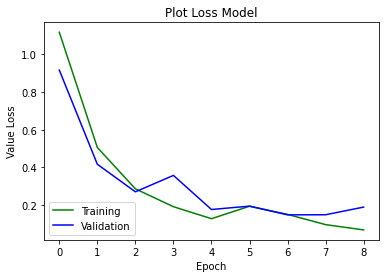

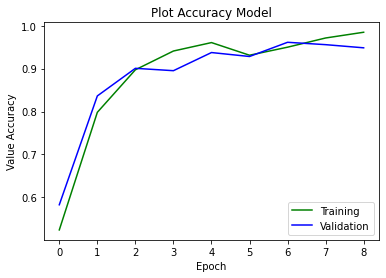

In [32]:
from matplotlib import pyplot as plt
#Plot Loss model
plt.plot(mod.history['loss'], label='Training', color='green')
plt.plot(mod.history['val_loss'], label='Validation', color='blue')
plt.title('Plot Loss Model')
plt.ylabel('Value Loss')
plt.xlabel('Epoch')
plt.legend(loc="lower left")
plt.show()

#Plot Accuracy model
plt.plot(mod.history['accuracy'], label='Training', color='green')
plt.plot(mod.history['val_accuracy'], label='Validation', color='blue')
plt.title('Plot Accuracy Model')
plt.ylabel('Value Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz.png
0vugygEjxQJPr9yz.png
KERTAS


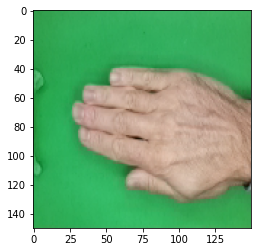

In [33]:
#main driver
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]!=0:
    print('KERTAS')
  elif classes[0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')